In [193]:
import tensorflow as tf
from tensorflow.python.keras import Input
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.regularizers import L2
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/practice-hackathon/sample_submission.csv
/kaggle/input/practice-hackathon/Train.csv
/kaggle/input/practice-hackathon/Test.csv


In [194]:
df = pd.read_csv("/kaggle/input/practice-hackathon/Train.csv")
df

,A,B,C,D,E,F,G,H,Target
0,F,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9
1,F,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12
2,M,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10
3,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
4,M,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6
...,...,...,...,...,...,...,...,...,...
3127,F,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3128,F,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3129,M,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3130,M,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


In [195]:
df.columns = ['apple', 'ball', 'carrot', 'dinosaur', 'egg', 'fish', 'gas', 'high', 'target']
one_hot_A = pd.get_dummies(df['apple'])
df = df.join(one_hot_A)
df.drop(['apple'], axis = 1,  inplace = True)
df.columns = ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'target', 'isF', 'isI', 'isM']

df

,b,c,d,e,f,g,h,target,isF,isI,isM
0,0.615,0.455,0.135,1.0590,0.4735,0.2630,0.274,9,1,0,0
1,0.515,0.395,0.140,0.6860,0.2810,0.1255,0.220,12,1,0,0
2,0.660,0.530,0.175,1.5830,0.7395,0.3505,0.405,10,0,0,1
3,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
4,0.495,0.400,0.155,0.8085,0.2345,0.1155,0.350,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3127,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9,1,0,0
3128,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12,1,0,0
3129,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11,0,0,1
3130,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9,0,0,1


In [196]:
#Standardising data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[['b', 'c', 'd', 'e', 'f', 'g', 'h']] = scaler.fit_transform(df[['b', 'c', 'd', 'e', 'f', 'g', 'h']])

df

,b,c,d,e,f,g,h,target,isF,isI,isM
0,0.749291,0.464226,-0.118869,0.457447,0.499098,0.743973,0.241135,9,1,0,0
1,-0.090254,-0.144654,-0.001647,-0.301655,-0.364269,-0.514040,-0.145838,12,1,0,0
2,1.127086,1.225326,0.818910,1.523852,1.692114,1.544526,1.179902,10,0,0,1
3,-0.593980,-0.449095,-1.056649,-0.651696,-0.617673,-0.738195,-0.647469,15,0,0,1
4,-0.258163,-0.093914,0.350020,-0.052352,-0.572823,-0.605532,0.785763,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3127,-0.300140,-0.093914,-0.587759,-0.539765,-0.476395,-0.449995,-0.683300,9,1,0,0
3128,1.211040,1.428286,1.170577,1.132090,0.808565,1.114515,1.144071,12,1,0,0
3129,-0.132231,-0.144654,-0.353314,-0.516361,-0.530215,-0.440846,-0.375155,11,0,0,1
3130,0.413473,0.565706,-0.470537,0.446253,0.689711,0.336834,-0.038345,9,0,0,1


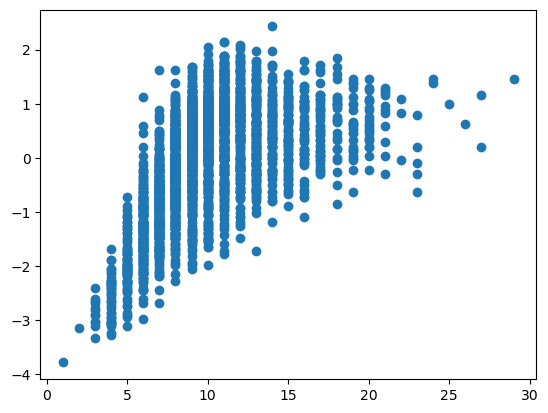

In [197]:
plt.scatter(df['target'], df['b'])
plt.show()

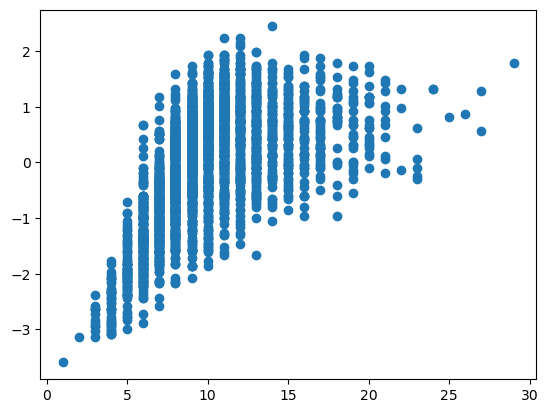

In [198]:
plt.scatter(df['target'], df['c'])
plt.show()

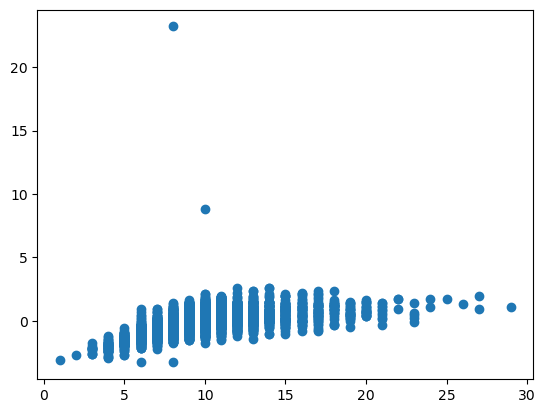

In [199]:
plt.scatter(df['target'], df['d'])
plt.show()

2 clear outliers over here... they need to be out

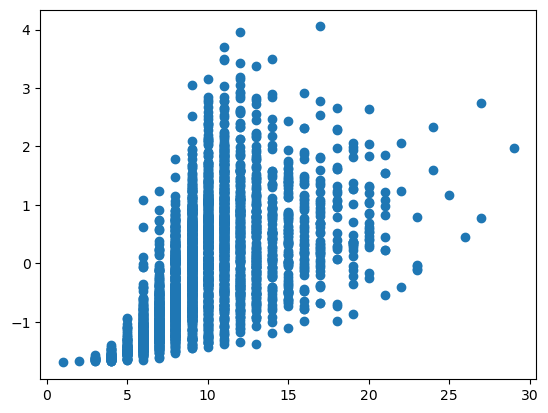

In [200]:
plt.scatter(df['target'], df['e'])
plt.show()

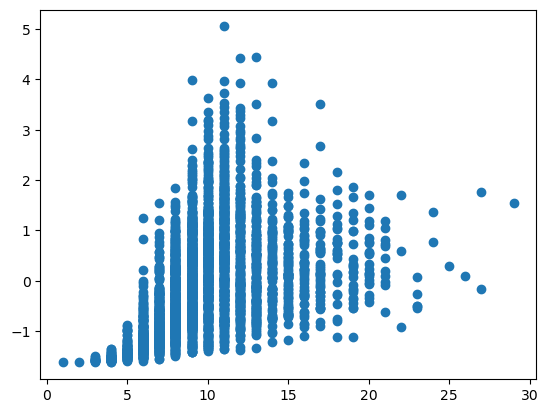

In [201]:
plt.scatter(df['target'], df['f'])
plt.show()

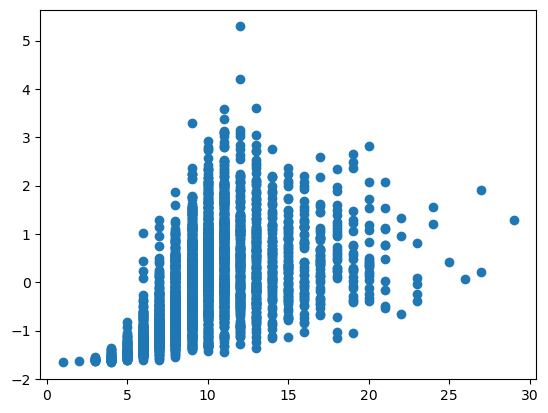

In [202]:
plt.scatter(df['target'], df['g'])
plt.show()

g > 5 outlier

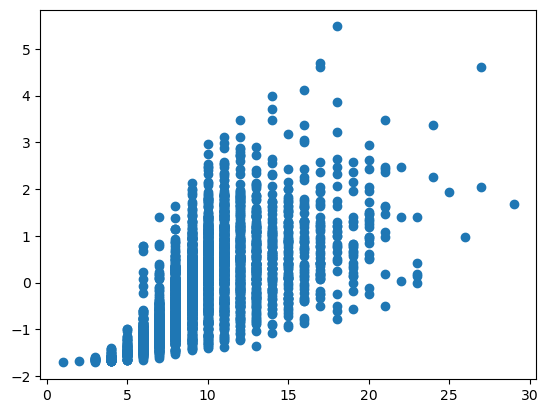

In [203]:
plt.scatter(df['target'], df['h'])
plt.show()

h > 5 also seems like an outlier as well

target > 25 look like outliers... pretty much for all plots

In [204]:
df[df['target'] > 25]

,b,c,d,e,f,g,h,target,isF,isI,isM
714,1.462904,1.783466,1.053355,1.980737,1.539624,1.279200,1.681533,29,1,0,0
1368,0.623359,0.870146,1.287800,0.454394,0.097688,0.076083,0.964917,26,0,0,1
1478,1.169063,1.276066,1.991135,2.745944,1.754905,1.915068,4.619659,27,0,0,1
1723,0.203587,0.565706,0.936133,0.769838,-0.169171,0.213320,2.039841,27,1,0,0


In [205]:
df[df['d'] > 5]

,b,c,d,e,f,g,h,target,isF,isI,isM
73,1.504881,1.580506,8.790035,2.799875,3.342603,2.788815,1.946681,10,0,0,1
1653,-0.593980,-0.550575,23.208394,-0.488886,-0.135533,-0.600957,-0.765711,8,1,0,0


In [206]:
df[df['g'] > 5]

,b,c,d,e,f,g,h,target,isF,isI,isM
1268,2.092562,2.240127,2.577247,3.958879,4.423494,5.291117,2.419648,12,0,0,1


In [207]:
df[df['h'] > 5]

,b,c,d,e,f,g,h,target,isF,isI,isM
654,1.67279,1.529766,1.639467,2.659451,1.290705,1.979113,5.479598,18,1,0,0


714, 1368, 1478, 1723, 73, 1653, 654, 1268 need to be dropped

In [208]:
df.drop([714, 1368, 1478, 1723, 73, 1653, 654, 1268], inplace = True)

In [209]:
df

,b,c,d,e,f,g,h,target,isF,isI,isM
0,0.749291,0.464226,-0.118869,0.457447,0.499098,0.743973,0.241135,9,1,0,0
1,-0.090254,-0.144654,-0.001647,-0.301655,-0.364269,-0.514040,-0.145838,12,1,0,0
2,1.127086,1.225326,0.818910,1.523852,1.692114,1.544526,1.179902,10,0,0,1
3,-0.593980,-0.449095,-1.056649,-0.651696,-0.617673,-0.738195,-0.647469,15,0,0,1
4,-0.258163,-0.093914,0.350020,-0.052352,-0.572823,-0.605532,0.785763,6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3127,-0.300140,-0.093914,-0.587759,-0.539765,-0.476395,-0.449995,-0.683300,9,1,0,0
3128,1.211040,1.428286,1.170577,1.132090,0.808565,1.114515,1.144071,12,1,0,0
3129,-0.132231,-0.144654,-0.353314,-0.516361,-0.530215,-0.440846,-0.375155,11,0,0,1
3130,0.413473,0.565706,-0.470537,0.446253,0.689711,0.336834,-0.038345,9,0,0,1


In [331]:
def split_dataset(dataset, train_frac=0.7):
    train = dataset.sample(frac=train_frac)
    val = dataset.drop(train.index)
    return train, val

train, validation = split_dataset(df, train_frac=0.7)


In [332]:
model = Sequential()
model.add(InputLayer(input_shape = (10,)))
model.add(Dense(25, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.09)))
model.add(Dense(25, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.09)))
model.add(Dense(25, activation='relu', kernel_regularizer = tf.keras.regularizers.L2(0.09)))
model.add(Dense(1, activation='linear'))

In [333]:
epochs = 2500
train_x = train[['b', 'c', 'd', 'e', 'f', 'g', 'h', 'isI', 'isF', 'isM']]
train_y = train['target']
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.33, random_state=1)
model.compile(loss='mse', optimizer='adamax')
history = model.fit(X_train, y_train, epochs=epochs, batch_size=64, verbose=1, validation_data=(X_val, y_val))

Epoch 1/2500
23/23 [==============================] - 1s 17ms/step - loss: 109.7571 - val_loss: 101.1031
Epoch 2/2500
23/23 [==============================] - 0s 7ms/step - loss: 97.6150 - val_loss: 88.7762
Epoch 3/2500
23/23 [==============================] - 0s 7ms/step - loss: 83.0667 - val_loss: 71.8738
Epoch 4/2500
23/23 [==============================] - 0s 5ms/step - loss: 64.5994 - val_loss: 52.5237
Epoch 5/2500
23/23 [==============================] - 0s 5ms/step - loss: 46.8963 - val_loss: 38.5361
Epoch 6/2500
23/23 [==============================] - 0s 4ms/step - loss: 38.3695 - val_loss: 34.2309
Epoch 7/2500
23/23 [==============================] - 0s 4ms/step - loss: 35.4546 - val_loss: 31.6486
Epoch 8/2500
23/23 [==============================] - 0s 4ms/step - loss: 32.7417 - val_loss: 29.1572
Epoch 9/2500
23/23 [==============================] - 0s 4ms/step - loss: 29.9690 - val_loss: 26.3283
Epoch 10/2500
23/23 [==============================] - 0s 4ms/step - loss: 27.0

In [334]:
test_results = model.evaluate(validation[['b', 'c', 'd', 'e', 'f', 'g', 'h', 'isI', 'isF', 'isM']], validation['target'], verbose=1)
print(f'Test set: - loss: {test_results} ')

30/30 [==============================] - 0s 2ms/step - loss: 4.4192
Test set: - loss: 4.419232368469238 


In [335]:
testdf = pd.read_csv("/kaggle/input/practice-hackathon/Test.csv")
testdf

,Index,A,B,C,D,E,F,G,H
0,866,M,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325
1,1483,M,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245
2,599,F,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335
3,1702,F,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380
4,670,M,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215
...,...,...,...,...,...,...,...,...,...
1040,532,I,0.470,0.370,0.120,0.4705,0.1845,0.1055,0.155
1041,3417,M,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.265
1042,1505,M,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.377
1043,2245,M,0.460,0.375,0.140,0.5105,0.1920,0.1045,0.205


In [336]:
one_hot = pd.get_dummies(testdf['A'])

one_hot

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
1040,0,1,0
1041,0,0,1
1042,0,0,1
1043,0,0,1


In [337]:
one_hot.columns = ['isF', 'isI', 'isM']

testdf = testdf.join(one_hot)

testdf.drop(['A'], axis = 1, inplace = True)


In [338]:
testdf

,Index,B,C,D,E,F,G,H,isF,isI,isM
0,866,0.605,0.455,0.160,1.1035,0.4210,0.3015,0.325,0,0,1
1,1483,0.590,0.440,0.150,0.8725,0.3870,0.2150,0.245,0,0,1
2,599,0.560,0.445,0.195,0.9810,0.3050,0.2245,0.335,1,0,0
3,1702,0.635,0.490,0.170,1.2615,0.5385,0.2665,0.380,1,0,0
4,670,0.475,0.385,0.145,0.6175,0.2350,0.1080,0.215,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1040,532,0.470,0.370,0.120,0.4705,0.1845,0.1055,0.155,0,1,0
1041,3417,0.580,0.460,0.150,1.0165,0.4910,0.2210,0.265,0,0,1
1042,1505,0.635,0.510,0.185,1.3080,0.5440,0.3180,0.377,0,0,1
1043,2245,0.460,0.375,0.140,0.5105,0.1920,0.1045,0.205,0,0,1


In [339]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

testdf[['B', 'C', 'D', 'E', 'F', 'G', 'H']] = scaler.fit_transform(testdf[['B', 'C', 'D', 'E', 'F', 'G', 'H']])

testdf

,Index,B,C,D,E,F,G,H,isF,isI,isM
0,866,0.702709,0.506540,0.565228,0.598132,0.321032,1.124407,0.657403,0,0,1
1,1483,0.580537,0.358240,0.309972,0.123634,0.165500,0.341149,0.077714,0,0,1
2,599,0.336195,0.407673,1.458625,0.346504,-0.209607,0.427171,0.729864,1,0,0
3,1702,0.947051,0.852575,0.820484,0.922680,0.858533,0.807482,1.055939,1,0,0
4,670,-0.356109,-0.185530,0.182343,-0.400163,-0.529821,-0.627738,-0.139670,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1040,532,-0.396832,-0.333830,-0.455797,-0.702117,-0.760832,-0.650375,-0.574437,0,1,0
1041,3417,0.499090,0.555974,0.309972,0.419425,0.641246,0.395479,0.222636,0,0,1
1042,1505,0.947051,1.050309,1.203369,1.018196,0.883693,1.273815,1.034201,0,0,1
1043,2245,-0.478280,-0.284397,0.054715,-0.619952,-0.726523,-0.659430,-0.212131,0,0,1


In [340]:
test_features = testdf[['B', 'C', 'D', 'E', 'F', 'G', 'H', 'isI', 'isF', 'isM']]

test_features

,B,C,D,E,F,G,H,isI,isF,isM
0,0.702709,0.506540,0.565228,0.598132,0.321032,1.124407,0.657403,0,0,1
1,0.580537,0.358240,0.309972,0.123634,0.165500,0.341149,0.077714,0,0,1
2,0.336195,0.407673,1.458625,0.346504,-0.209607,0.427171,0.729864,0,1,0
3,0.947051,0.852575,0.820484,0.922680,0.858533,0.807482,1.055939,0,1,0
4,-0.356109,-0.185530,0.182343,-0.400163,-0.529821,-0.627738,-0.139670,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1040,-0.396832,-0.333830,-0.455797,-0.702117,-0.760832,-0.650375,-0.574437,1,0,0
1041,0.499090,0.555974,0.309972,0.419425,0.641246,0.395479,0.222636,0,0,1
1042,0.947051,1.050309,1.203369,1.018196,0.883693,1.273815,1.034201,0,0,1
1043,-0.478280,-0.284397,0.054715,-0.619952,-0.726523,-0.659430,-0.212131,0,0,1


In [341]:
y_pred = model.predict(test_features, batch_size = 64, verbose = 1)

y_pred = y_pred.flatten()

y_pred

17/17 [==============================] - 0s 1ms/step


array([11.9746  ,  9.256486, 15.663899, ..., 11.541828, 11.945991,
        9.23757 ], dtype=float32)

In [342]:
result = pd.DataFrame({'Index' : testdf['Index'], 'Target' : y_pred})

result

,Index,Target
0,866,11.974600
1,1483,9.256486
2,599,15.663899
3,1702,11.399532
4,670,12.279513
...,...,...
1040,532,9.206932
1041,3417,9.234270
1042,1505,11.541828
1043,2245,11.945991


In [343]:
result.to_csv("submission.csv", index = False)